In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import json

import sys
import os
sys.path.append(os.path.abspath('../src/'))
from data_process_func import parce_mess, \
                              parce_side, \
                              parce_date, \
                              parce_time, \
                              parce_pick, \
                              parce_drop, \
                              parce_pax

#matplotlib
import matplotlib.pyplot as plt
#Bukit Timah'

In [2]:
font = {'family' : 'serif',
    'sans-serif' : 'Georgia'}
        #'weight' : 'bold'}
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
# plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (16,8)

S = 15
M = 18
B = 28

lw =5

plt.rc('font', size      = S)          # controls default text sizes
plt.rc('axes', titlesize = B)     # fontsize of the axes title
plt.rc('axes', labelsize = M)    # fontsize of the x and y labels
plt.rc('xtick', labelsize= S)    # fontsize of the tick labels
plt.rc('ytick', labelsize= S)    # fontsize of the tick labels
plt.rc('legend', fontsize= M)    # legend fontsize
plt.rc('figure', titlesize=B)  # fontsize of the figure title

# Plot charts

plot = {'linewidth': 6}

# Colors

C1 = '#144974' #(20,73,116)
C2 = '#0070C0'
C3 = '#A0A0A0'

dash = '--'

# legend locations
ul = 'upper left'
ur = 'upper right'

# Bar charts

bar = {"width":0.6}

# plot layout

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# grid

plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

In [3]:
act_mess_df = pd.read_hdf('../data/SGHitch_msg.HDF5', key = 'random_key')

In [35]:
# Sampling parameters
W = '15T' # Window to get rid of same messages reposting

In [4]:
act_mess_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59970 entries, 2019-10-12 16:00:55+00:00 to 2019-11-07 06:35:28+00:00
Data columns (total 10 columns):
user_id     59970 non-null int64
username    44645 non-null object
message     59970 non-null object
fl          59970 non-null int64
m_date      57029 non-null object
time        58129 non-null object
pick        58296 non-null object
drop        57450 non-null object
pax         55811 non-null object
dist        42984 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 5.0+ MB


In [26]:
act_mess_df.head()

,user_id,username,message,fl,m_date,time,pick,drop,pax,dist
date,,,,,,,,,,
2019-10-12 16:00:55+00:00,360992588,cssksskyy,👋 Hitcher looking for Driver\n\nPick Up: Bugis...,0,today,before 12.30am,bugis plus,bedok,2,7.0
2019-10-12 16:01:02+00:00,40672545,jacindakyt,👋🏼Hitcher looking for drivers.\n\nPick up: MBS...,0,today,now,mbs,sembawang,3,1.0
2019-10-12 16:01:09+00:00,152253888,NaN,🚗 Driver looking for hitcher \nPick up : CCK\n...,1,today,NaN,cck,anywhere,1-3,23.0
2019-10-12 16:01:14+00:00,47916066,SiangFong,👋 Hitcher looking for Driver\nPick up: Bar ro...,0,today,now,bar room siglap,pioneer hall 18d,1,15.0
2019-10-12 16:01:41+00:00,38032084,etheltasha,👋🏻 Hitcher looking for driver\nPick up: cq\nDr...,0,today,now,cq,owen road,1,NaN


In [6]:
act_mess_df.tail()

,user_id,username,message,fl,m_date,time,pick,drop,pax,dist
date,,,,,,,,,,
2019-11-07 06:34:15+00:00,810427926,NaN,Hi,2,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 06:34:23+00:00,810427926,NaN,Hitcher,2,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 06:34:57+00:00,810427926,NaN,Hitcher looking for driver’s,0,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 06:35:05+00:00,484109572,thattalldouche,👋 Hitcher looking for Driver\nPick Up: punggol...,0,today,now,punggol,west mall,1,19.0
2019-11-07 06:35:28+00:00,980326891,bthk14108,👋 driver looking for hitcher\nPick Up:skypark ...,1,today,now,skypark residence sembawang,east coast park,1,27.0


In [7]:
# act_mess_df['pick'][act_mess_df['fl']==0].value_counts()

### Creating `to_dist`

In [53]:
# map = json.load(open('../src/distr_map.json'))
# to_distr = {}
# for key, val in map.items():
#     for w in val:
#         to_distr[w.lower()] = int(key)
# json.dump(to_distr,open('../src/mess_to_distr.json',"w"))

---------------------------------------------------------------

In [9]:
# to_distr

In [27]:
act_mess_df['pick'][(act_mess_df['fl']==0)].count()

43552

In [31]:
act_mess_df['pick'][(act_mess_df['fl']==0) & (act_mess_df['dist'].isnull())].value_counts()

clark quay                       73
tamp                             73
beauty world                     73
temasek poly                     72
khatib                           72
concorde hotel                   68
nex                              67
jcube                            67
cq                               65
tanah merah                      63
ubi                              61
pioneer                          58
imm                              57
the cathay                       57
cineleisure                      56
jem                              56
keat hong close                  54
smu                              52
kaki bukit                       52
prinsep                          52
golden mile complex              51
hillview                         49
orto                             48
robertson quay                   47
boon keng                        47
teck whye                        47
seng kang                        46
redhill                     

In [12]:
# to_distr

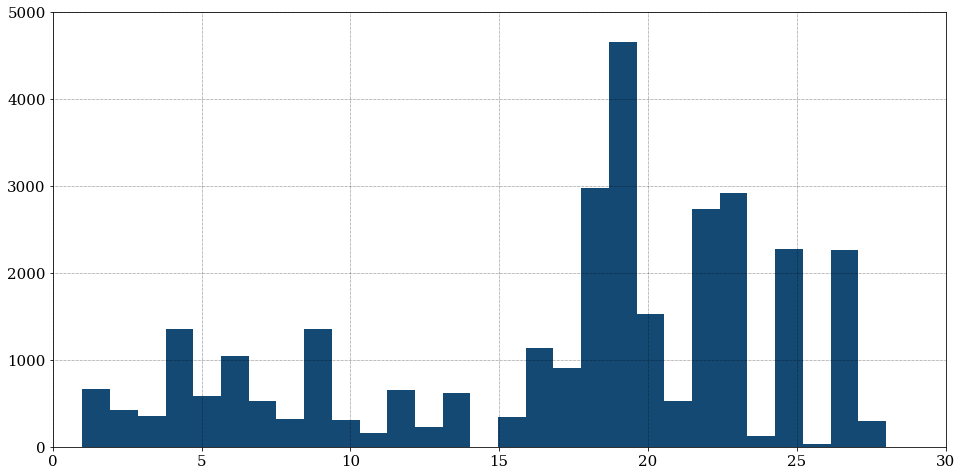

In [32]:
act_mess_df['dist'][(act_mess_df['fl']==0) & (act_mess_df['dist'].notnull())].hist(bins=29,color = C1);

In [33]:
# act_mess_df['date'] = pd.to_datetime(act_mess_df['date'])
act_mess_df.index.date

array([datetime.date(2019, 10, 12), datetime.date(2019, 10, 12),
       datetime.date(2019, 10, 12), ..., datetime.date(2019, 11, 7),
       datetime.date(2019, 11, 7), datetime.date(2019, 11, 7)],
      dtype=object)

In [39]:
hourly_df = act_mess_df[['dist','user_id','username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == 1)].copy()
hourly_df['count'] = hourly_df['user_id'].rolling(W).apply(
                     lambda x: np.sum(x == x[-1])==1)
hourly_df = hourly_df.resample('H').sum()
hourly_df['1'] = hourly_df['count']
hourly_df = hourly_df.drop(['dist','user_id','count'],axis=1)
for i in range(2,29):
    tmp = act_mess_df[['user_id']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == i)].copy()
    tmp['count'] = tmp['user_id'].rolling(W).apply(
                     lambda x: np.sum(x == x[-1])==1)

    tmp = tmp.resample('H').sum()
    hourly_df[str(i)] = tmp['count']

/home/egor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until
/home/egor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  # Remove the CWD from sys.path while we load stuff.


In [41]:
# Getting rid of same messages reposting

hourly_df

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
date,,,,,,,,,,,,,,,,,,,,,
2019-10-12 16:00:00+00:00,3.0,2.0,NaN,5.0,1.0,3.0,1.0,1.0,6.0,2.0,...,2.0,2.0,1.0,6.0,6.0,NaN,2.0,NaN,4.0,1.0
2019-10-12 17:00:00+00:00,3.0,2.0,NaN,21.0,0.0,3.0,0.0,0.0,3.0,4.0,...,7.0,7.0,1.0,4.0,2.0,NaN,1.0,NaN,4.0,0.0
2019-10-12 18:00:00+00:00,5.0,0.0,2.0,26.0,0.0,4.0,1.0,1.0,3.0,2.0,...,6.0,5.0,0.0,3.0,9.0,NaN,3.0,NaN,1.0,1.0
2019-10-12 19:00:00+00:00,2.0,2.0,2.0,10.0,0.0,5.0,0.0,1.0,6.0,0.0,...,2.0,0.0,1.0,1.0,1.0,NaN,2.0,NaN,2.0,0.0
2019-10-12 20:00:00+00:00,3.0,1.0,0.0,1.0,1.0,21.0,0.0,1.0,3.0,0.0,...,3.0,1.0,0.0,2.0,1.0,NaN,0.0,NaN,4.0,0.0
2019-10-12 21:00:00+00:00,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,5.0,0.0,...,3.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,2.0,0.0
2019-10-12 22:00:00+00:00,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,4.0,0.0,...,3.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,2.0,1.0
2019-10-12 23:00:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,3.0,NaN,1.0,NaN,2.0,0.0
2019-10-13 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,1.0,1.0,3.0,5.0,NaN,2.0,NaN,2.0,0.0


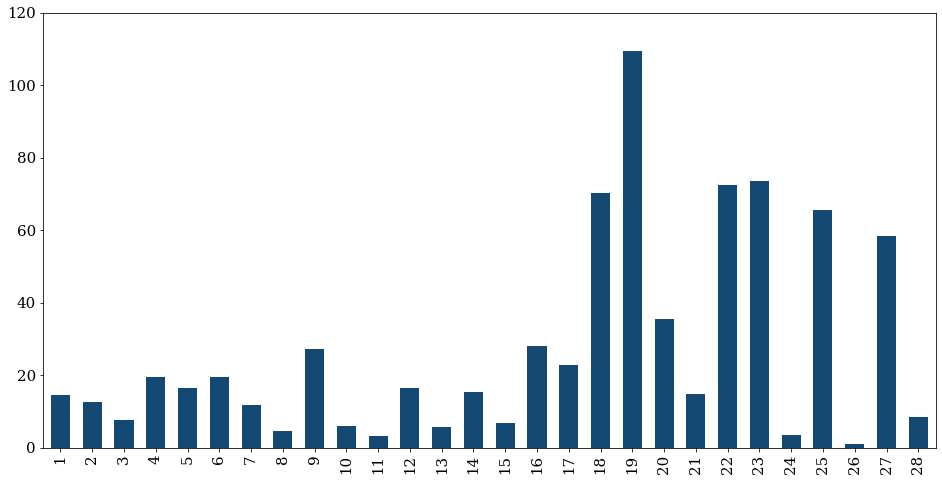

In [42]:
hourly_df.fillna(0)
hourly_df = hourly_df.resample('D').sum()
hourly_df[hourly_df.index.dayofweek < 5].mean().plot.bar(**bar, color = C1);
# hourly_df[hourly_df.index.dayofweek >= 5].mean().plot.bar()
plt.savefig('../img/avg_pax_per_weekday.png')

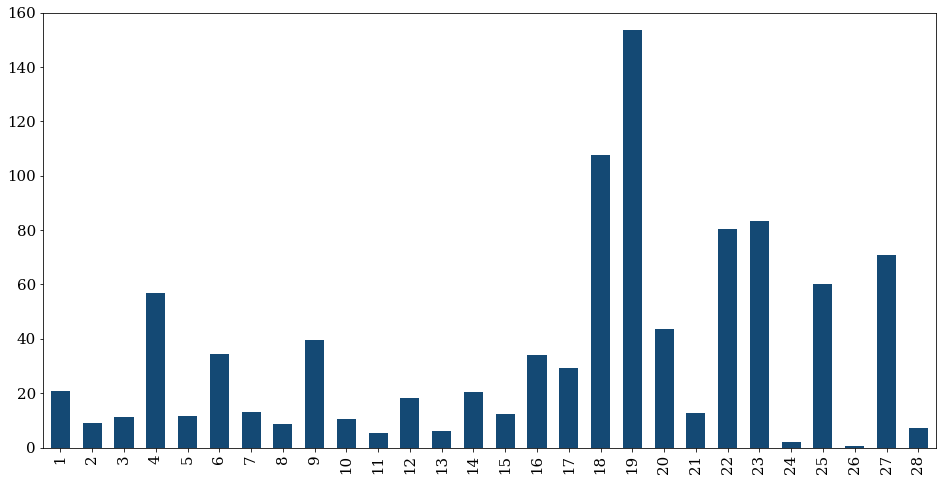

In [43]:
hourly_df[hourly_df.index.dayofweek >= 5].mean().plot.bar(**bar, color = C1);
plt.savefig('../img/avg_pax_per_weekend.png')

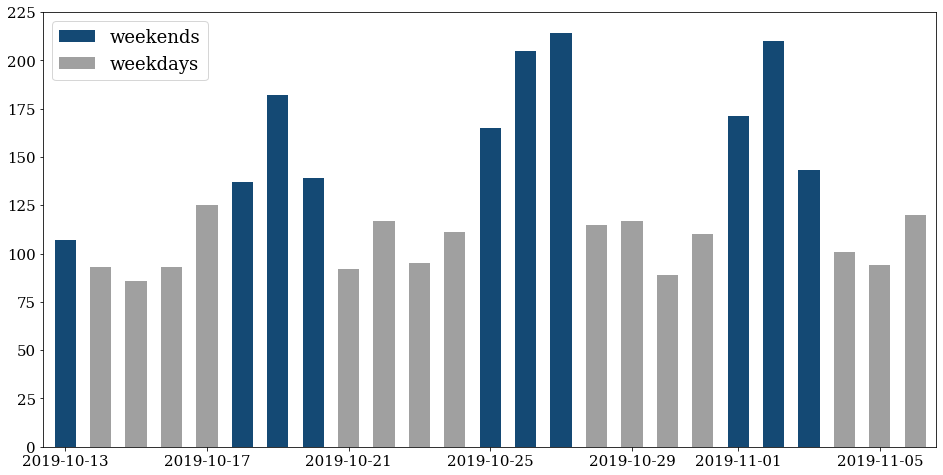

In [44]:
left = '2019-10-12 09:00:00+00:00'
right = '2019-11-06 14:00:00+00:00'

fig, ax = plt.subplots()

ax.bar(hourly_df.index.date,hourly_df['19'][hourly_df.index.dayofweek < 7], color = C1, \
        label = 'weekends', **bar)
ax.bar(hourly_df['19'][hourly_df.index.dayofweek < 4].index.date, \
       hourly_df['19'][hourly_df.index.dayofweek < 4], color = C3, label = 'weekdays', **bar);
ax.legend();
ax.set_xbound(left,right)
plt.savefig('../img/dist19_avg_pax_per_day.png');

In [45]:
d19 = act_mess_df[['dist','username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == 19)].copy()
# d19['date'] = pd.to_datetime(d19['date'])
d19 = d19.resample('H').count()
d19['DoW'] = d19.index.dayofweek

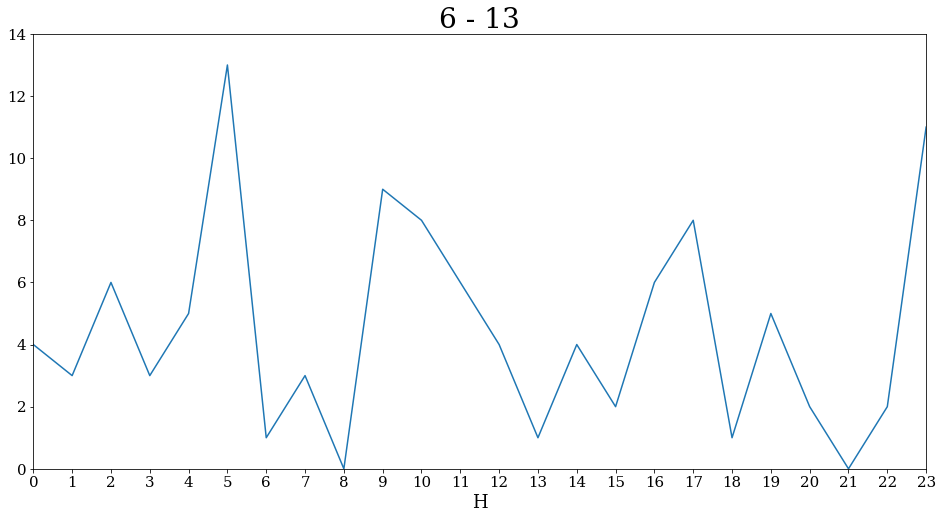

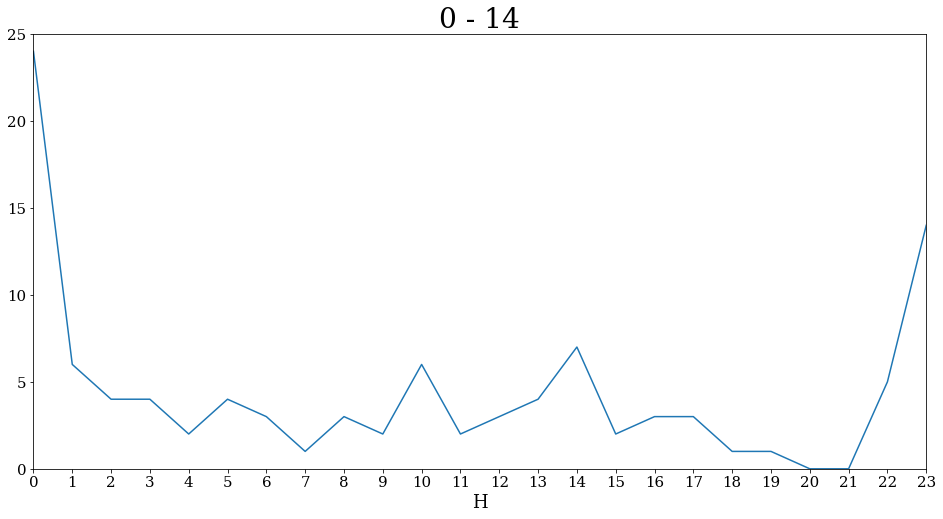

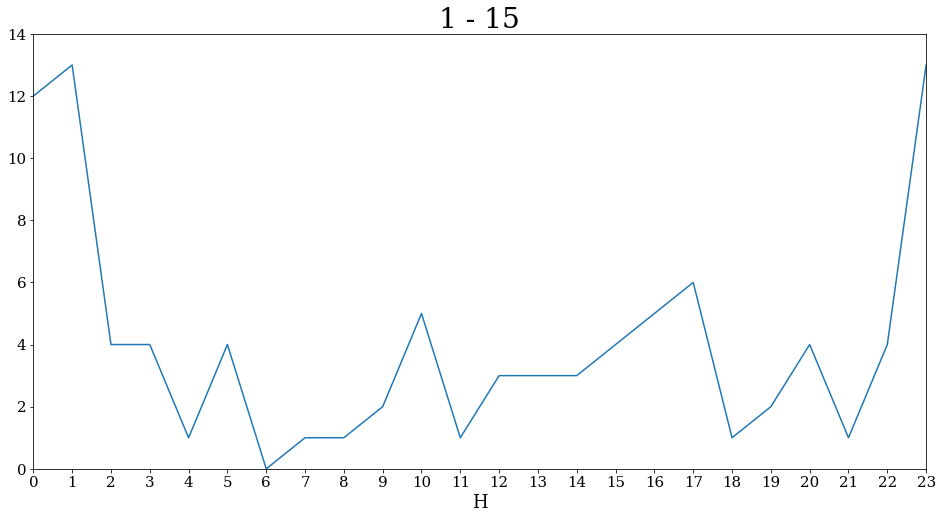

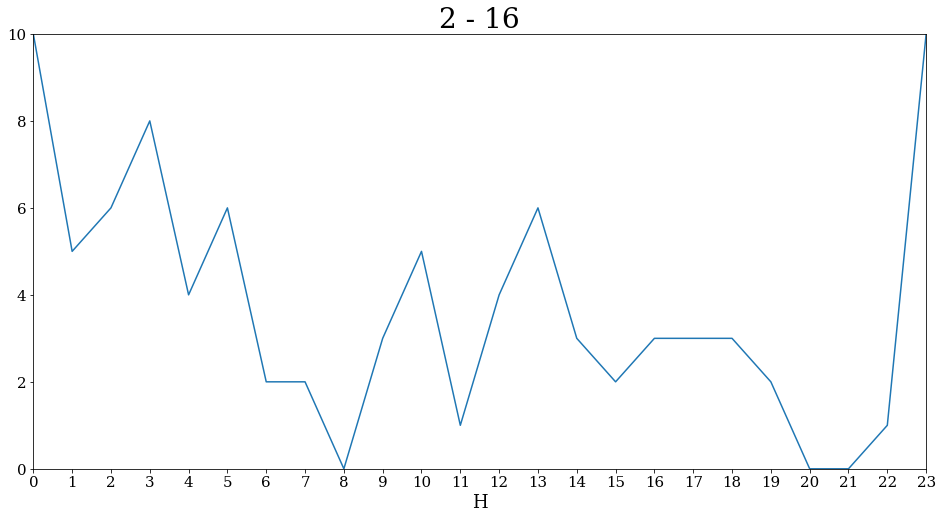

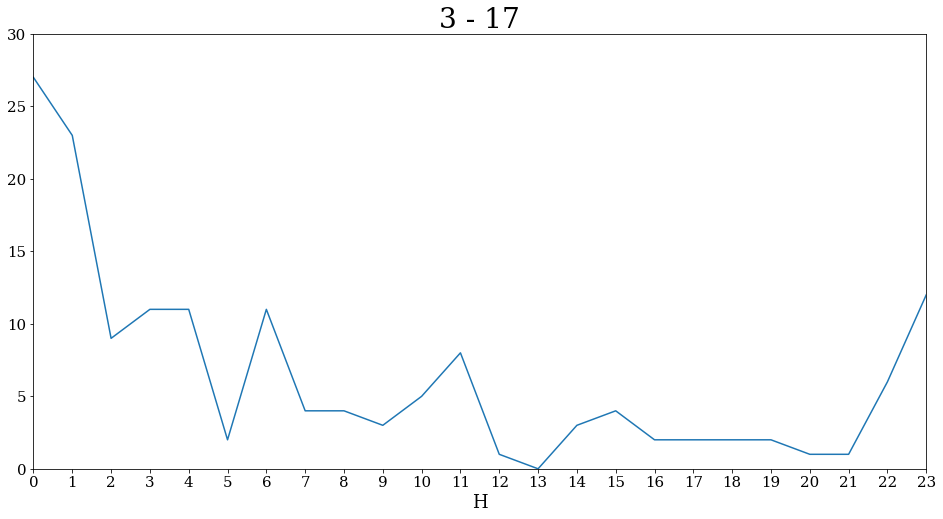

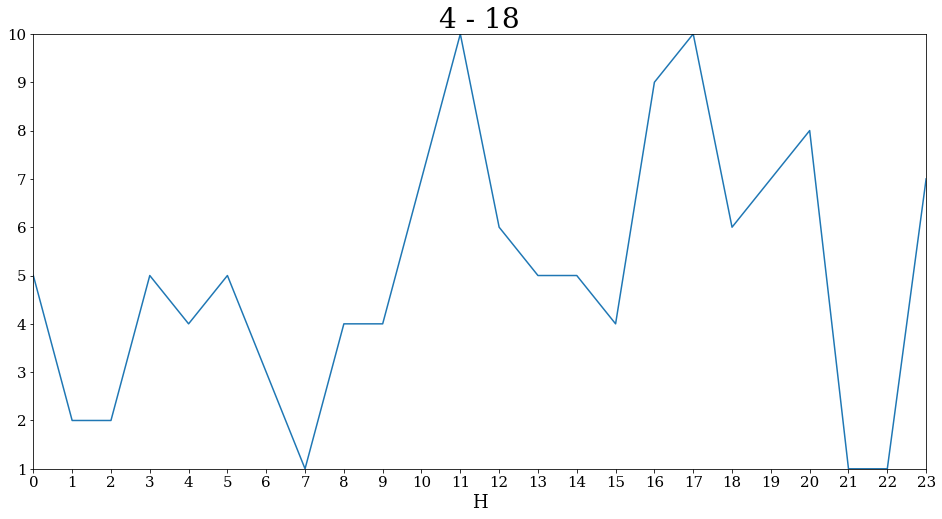

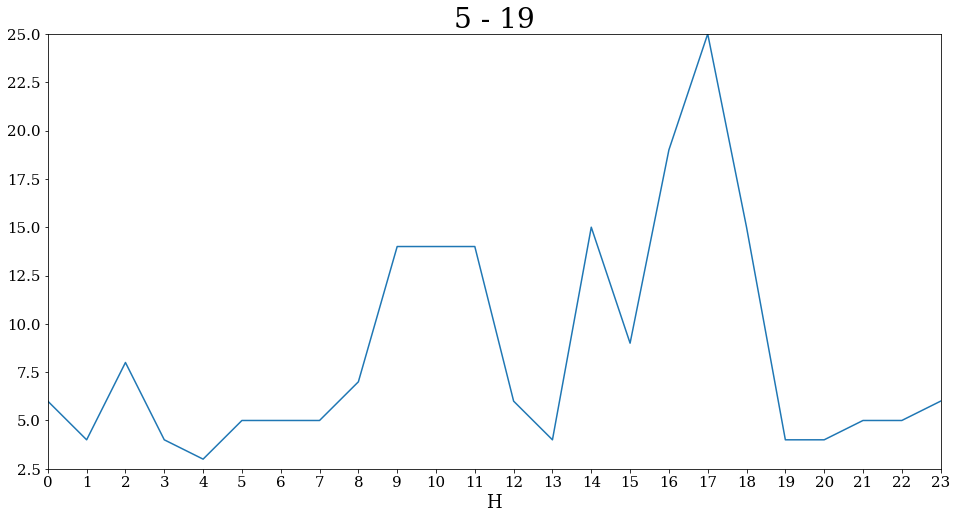

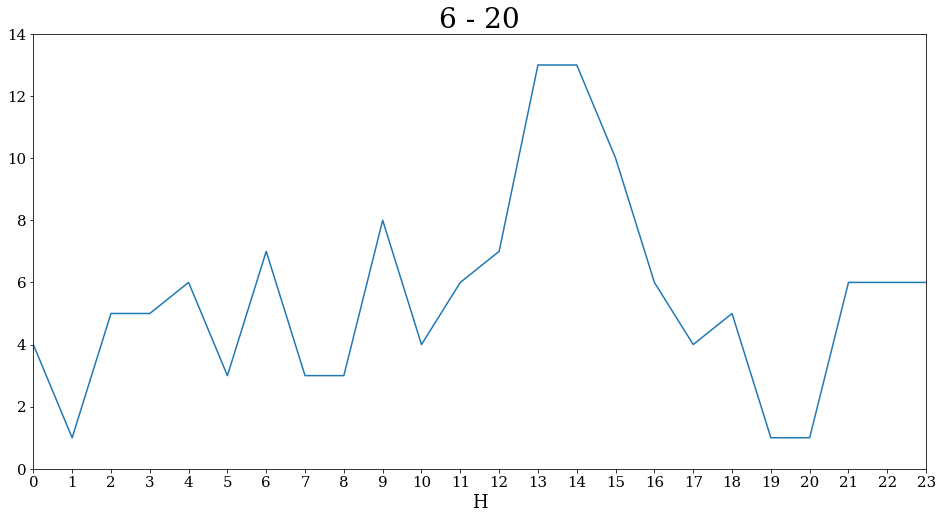

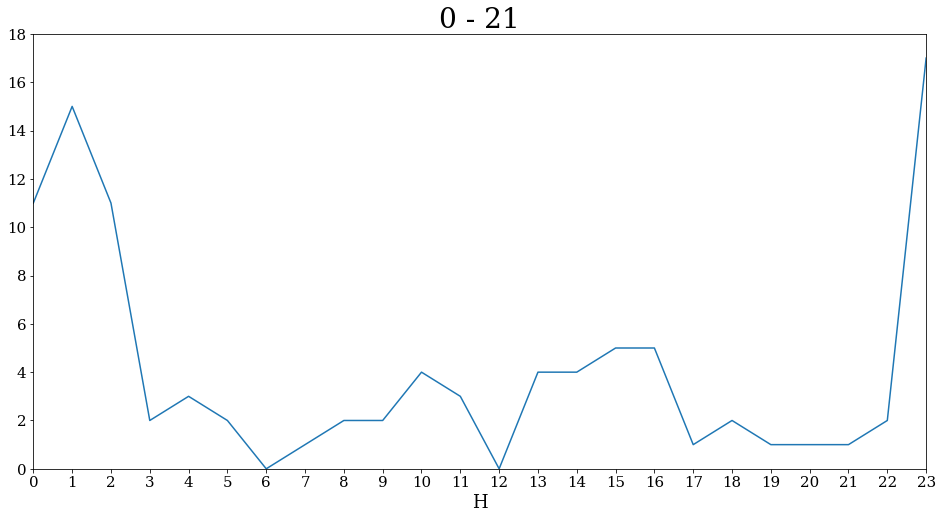

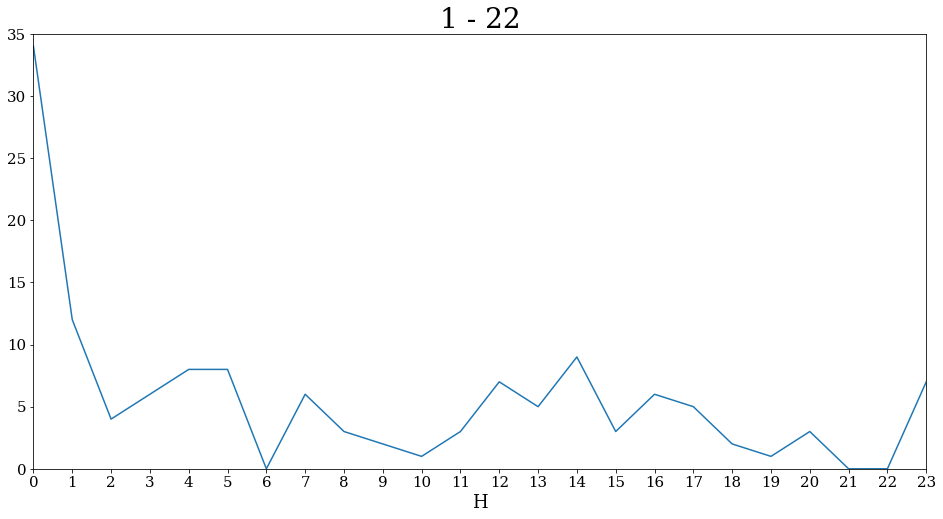

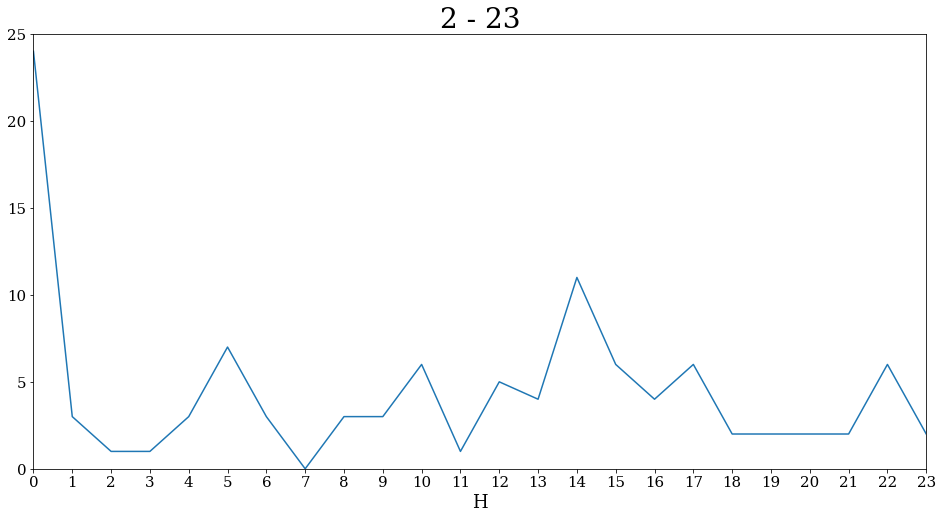

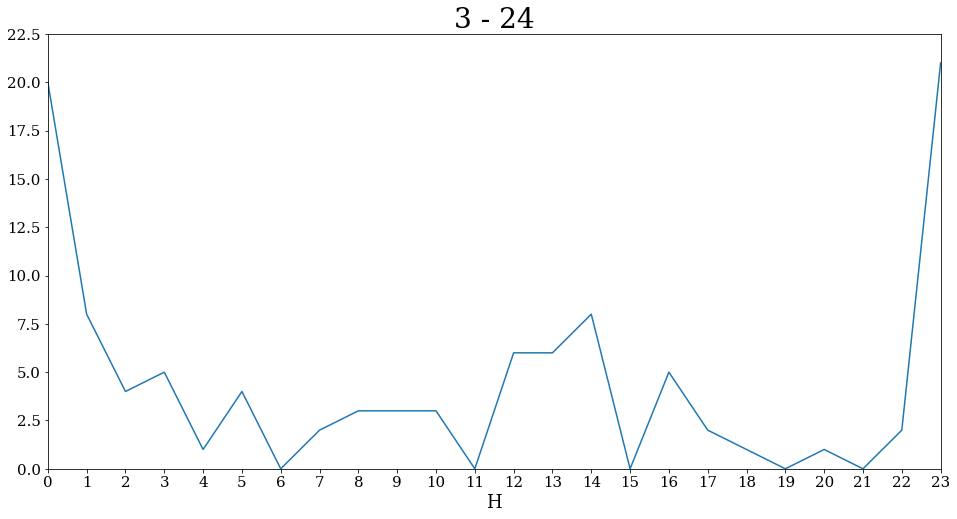

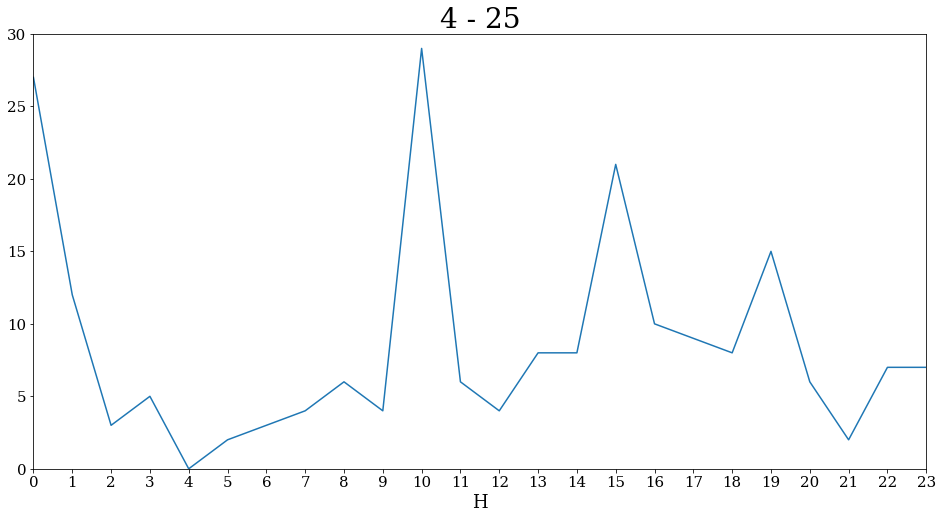

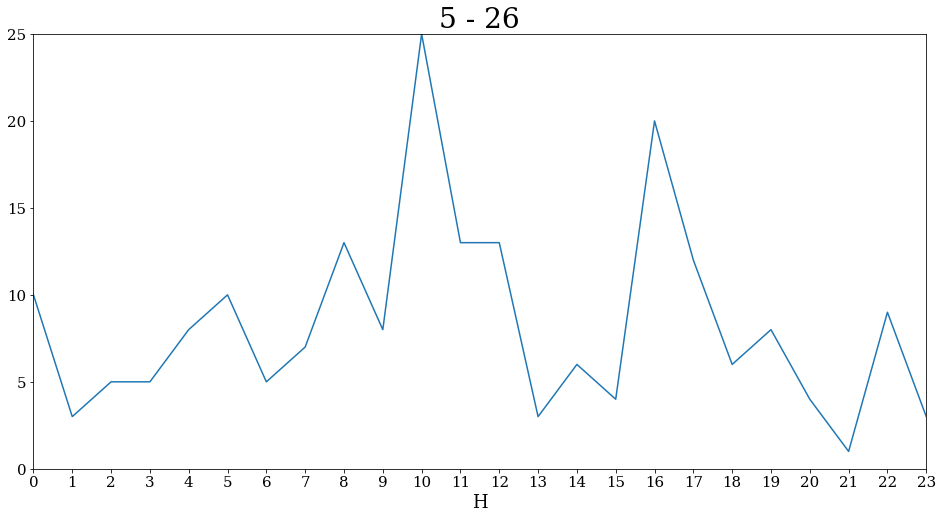

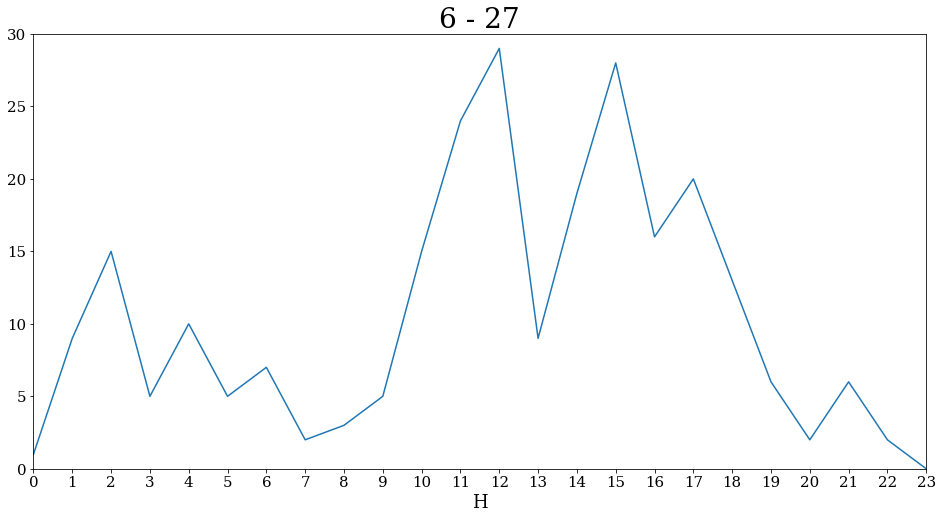

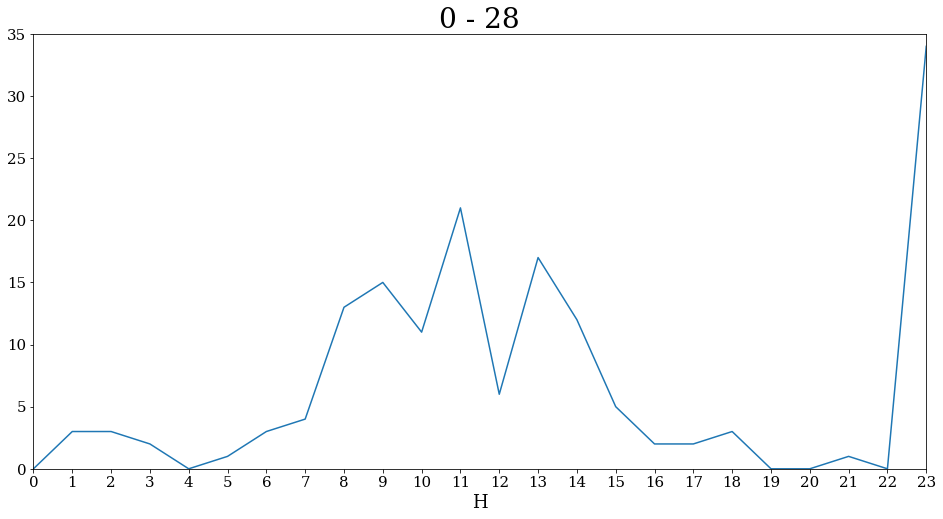

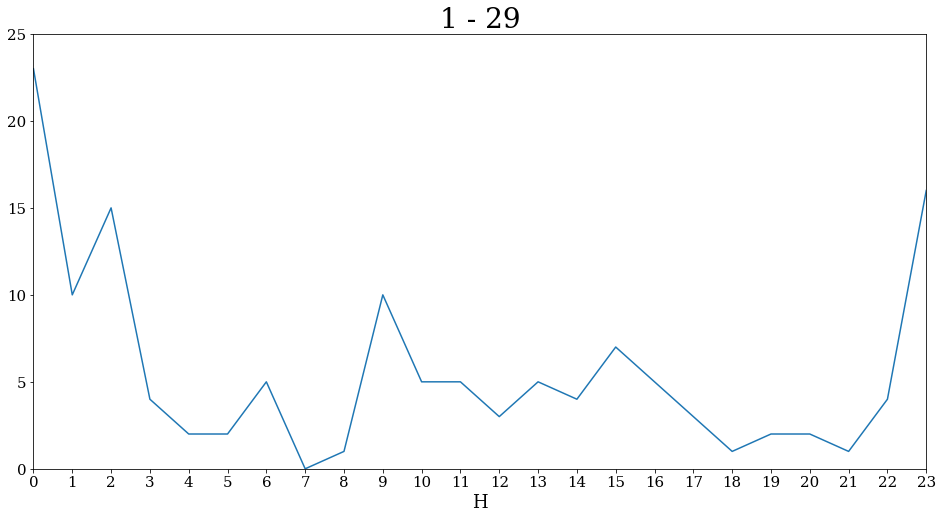

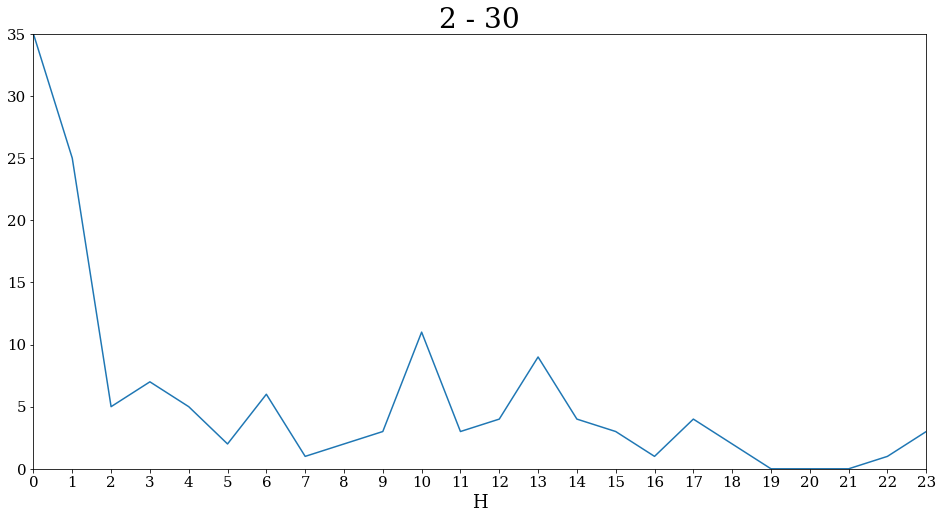

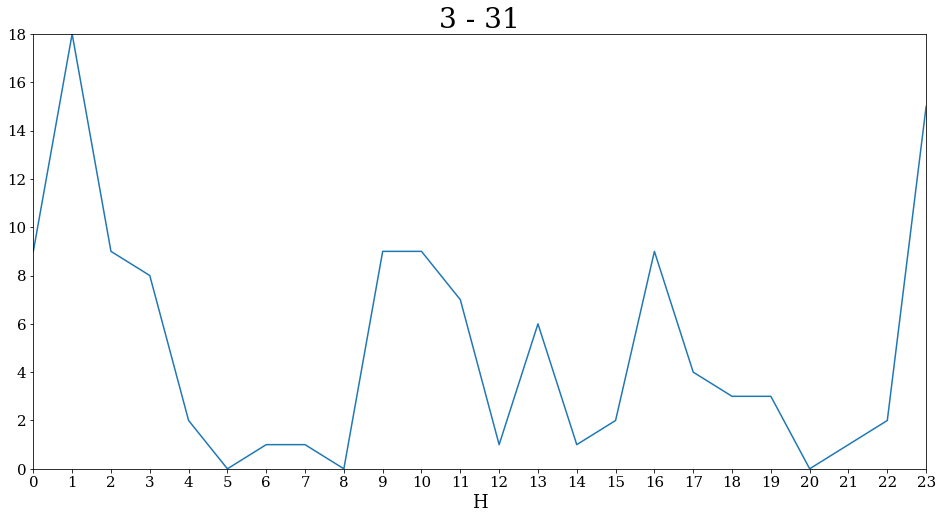

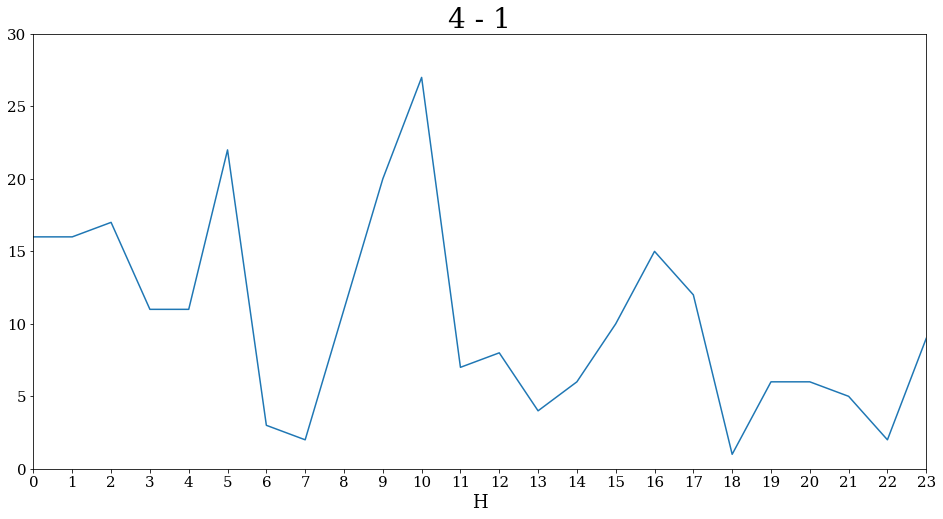

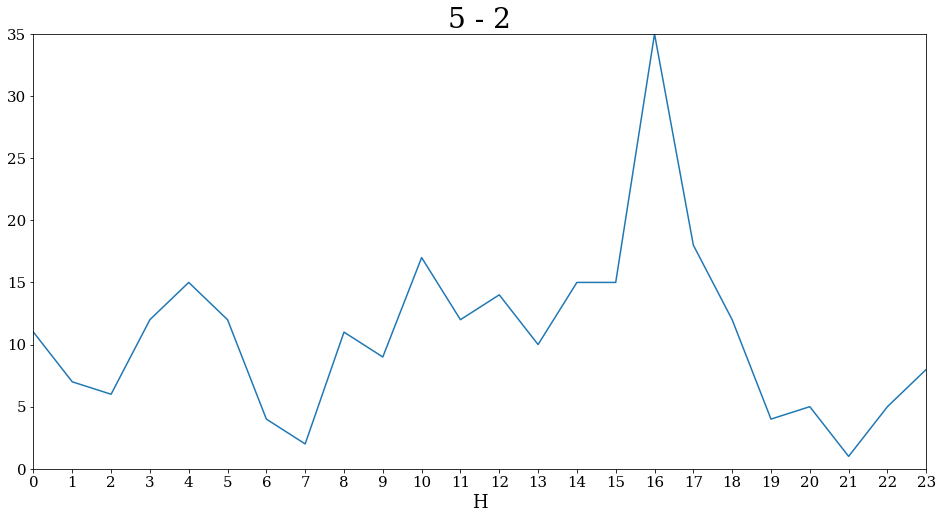

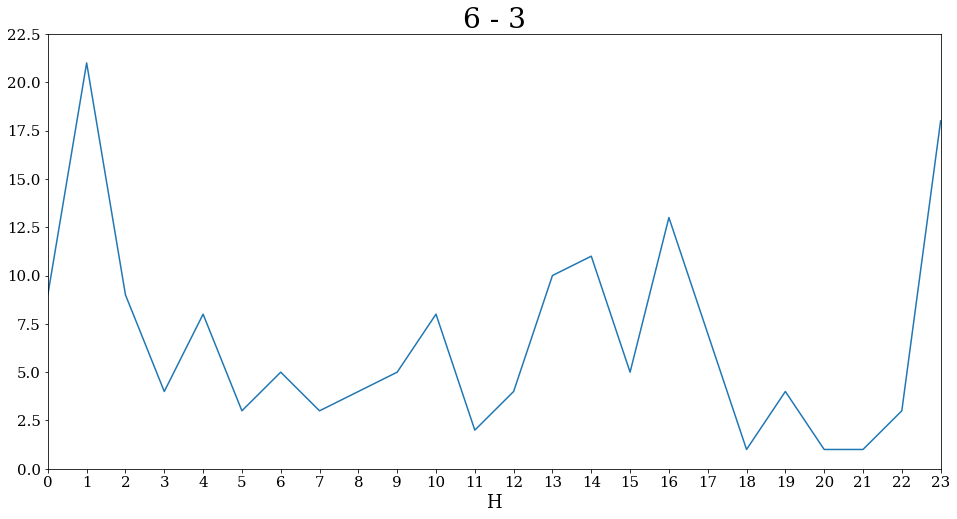

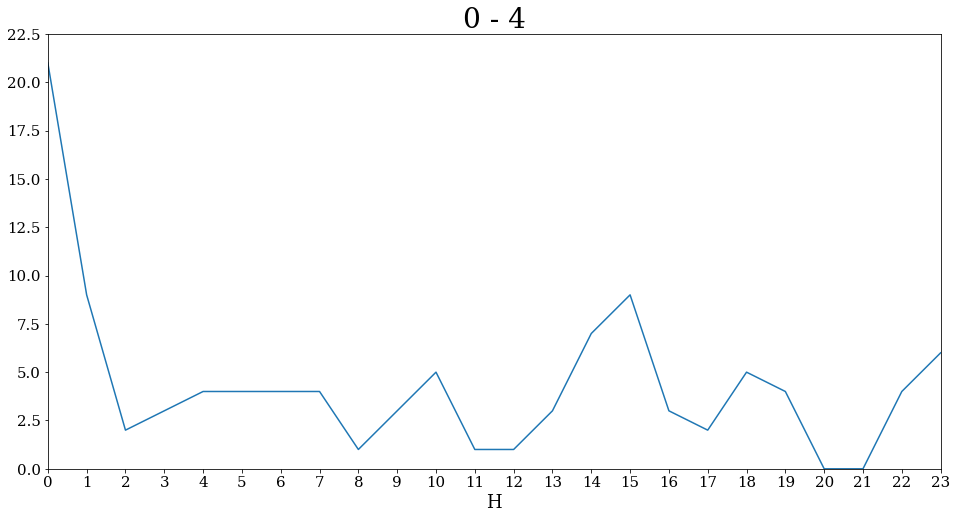

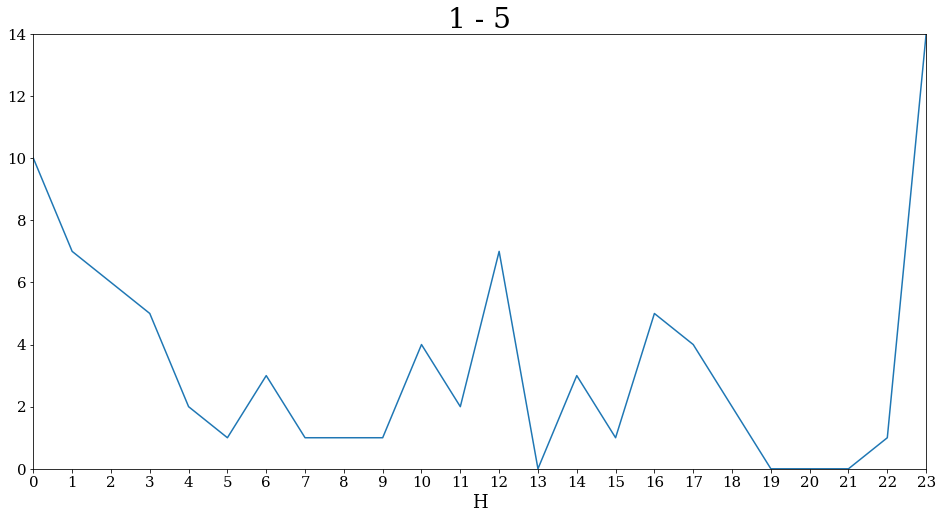

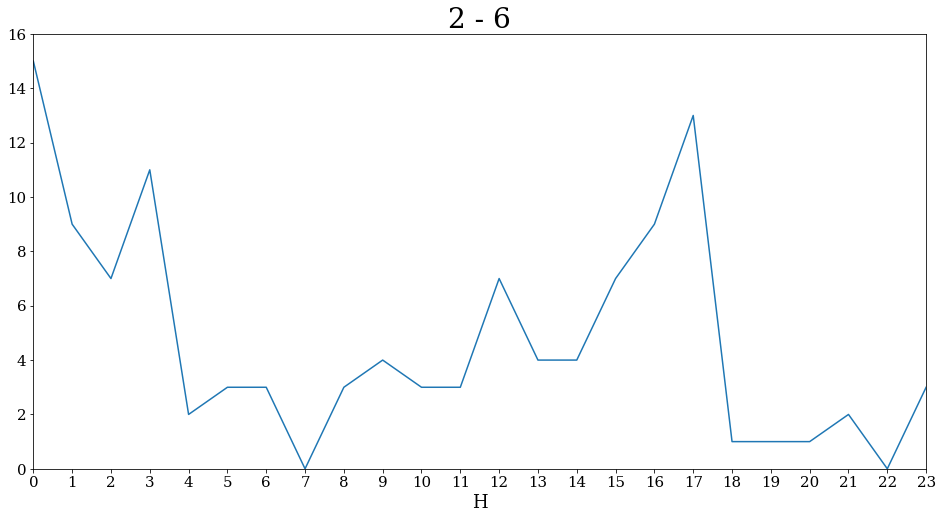

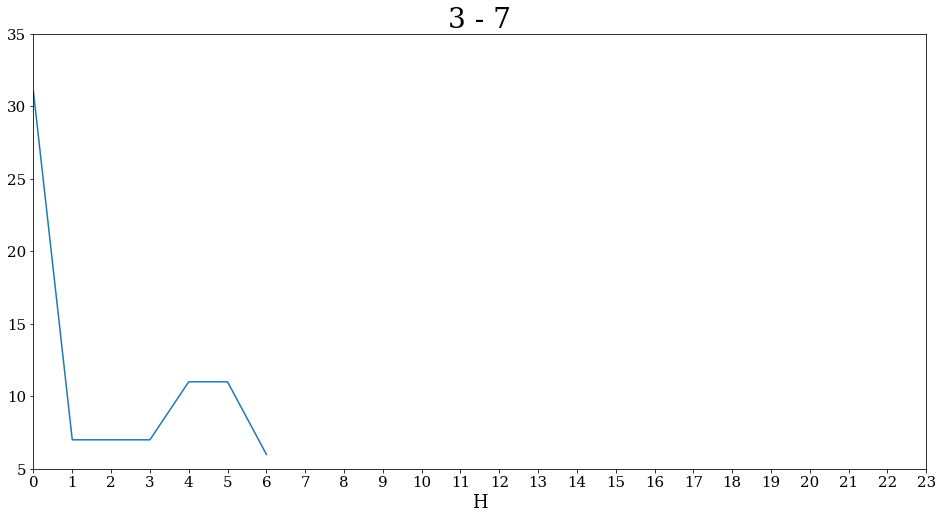

In [47]:
d19['H'] = d19.index.hour
for i in range(13,32):
    start = f'2019-10-{i} 00:00:00'
    end = f'2019-10-{i} 23:00:00'
    temp = d19[start:end]
    temp.set_index('H')['username'].plot()
    plt.title(str(temp.index.dayofweek[0])+" - "+str(temp.index.day[0]))
    plt.xticks(range(24))
    plt.show();
for i in range(1,8):
    start = f'2019-11-{i} 00:00:00'
    end = f'2019-11-{i} 23:00:00'
    temp = d19[start:end]
    temp.set_index('H')['username'].plot()
    plt.title(str(temp.index.dayofweek[0])+" - "+str(temp.index.day[0]))
    plt.xticks(range(24))
    plt.show();

In [48]:
# d19.set_index('H')['username'].plot()

In [49]:
hourly = act_mess_df[['dist','username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == 1)].copy()
# hourly['date'] = pd.to_datetime(hourly['date'])
# hourly = hourly.set_index('date')
hourly = hourly.resample('H').count()
hourly['1'] = hourly['username']
hourly = hourly.drop(['dist','username'],axis=1)
for i in range(2,29):
    tmp = act_mess_df[['username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == i)].copy()
#     tmp = tmp.set_index('date')
    tmp = tmp.resample('H').count()
    hourly[str(i)] = tmp['username']

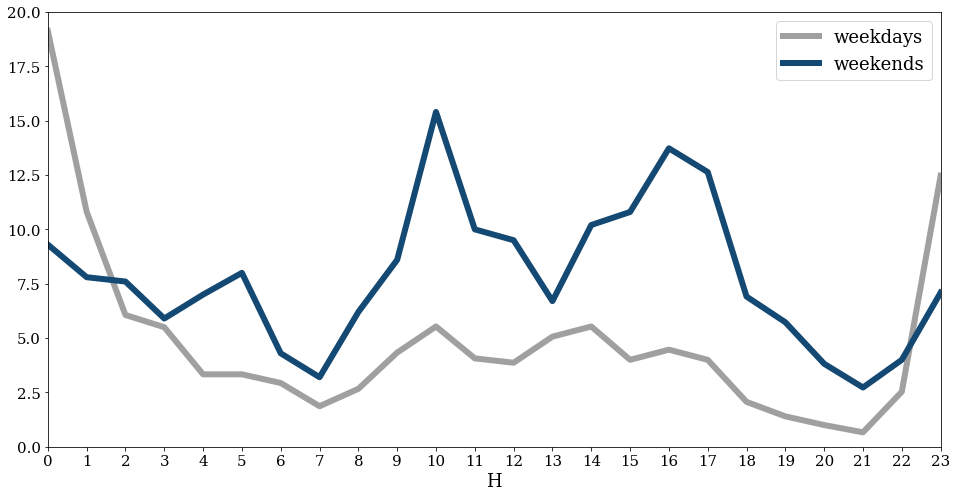

In [51]:
hourly.fillna(0)
hourly['H'] = hourly.index.hour
hourly = hourly.fillna(0)
hourly[hourly.index.dayofweek < 4].set_index('H')['19'
      ].groupby('H').mean().plot(color=C3, label = 'weekdays', **plot)
hourly[hourly.index.dayofweek > 3].set_index('H')['19'
      ].groupby('H').mean().plot(color=C1, label = 'weekends', **plot)
plt.xticks(range(24))
plt.legend()
plt.savefig('../img/dist19_intraday.png');

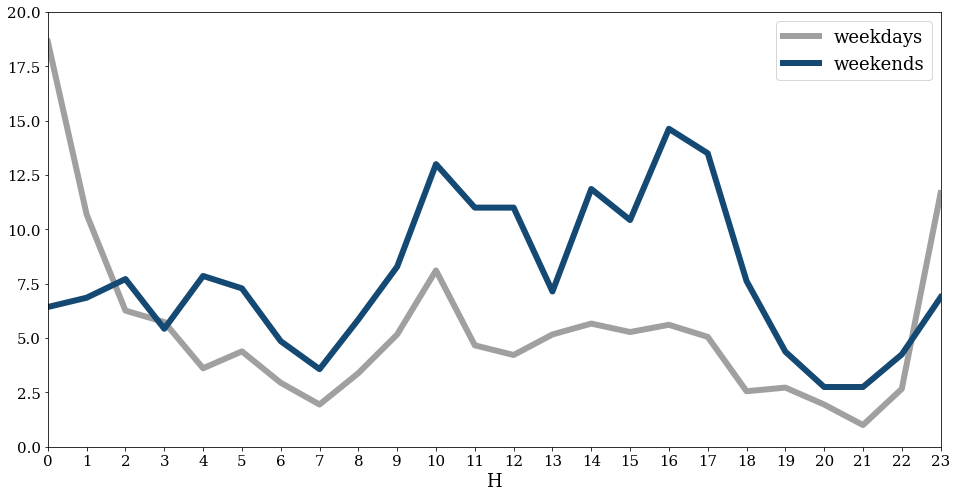

In [52]:
hourly.fillna(0)
hourly['H'] = hourly.index.hour
hourly = hourly.fillna(0)
hourly[hourly.index.dayofweek < 5].set_index('H')['19'
      ].groupby('H').mean().plot(color=C3, label = 'weekdays', **plot)
hourly[hourly.index.dayofweek > 4].set_index('H')['19'
      ].groupby('H').mean().plot(color=C1, label = 'weekends', **plot)
plt.xticks(range(24))
plt.legend()
# plt.savefig('../img/dist19_intraday.png');